In [201]:
from __future__ import division, print_function

import skfuzzy as fuzz
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [202]:
original_image1 = cv2.imread('mollahoseini-karimi.jpg')
original_image1 = original_image1[:,:256]
img1 = cv2.cvtColor(original_image1, cv2.COLOR_BGR2RGB)
#img1 = original_image1

In [203]:
vectorized1 = img1.reshape((-1, 3))

In [204]:
vectorized1_t = np.transpose(vectorized1)
vectorized1_t.shape

(3, 65536)

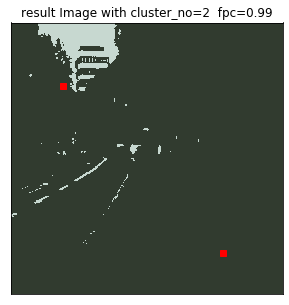

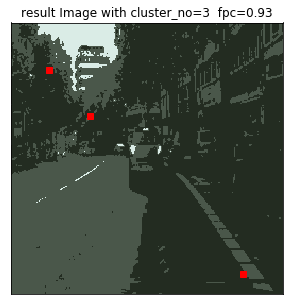

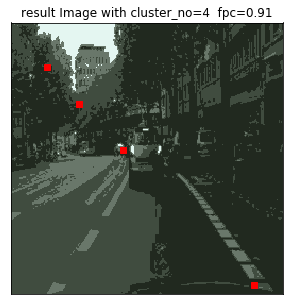

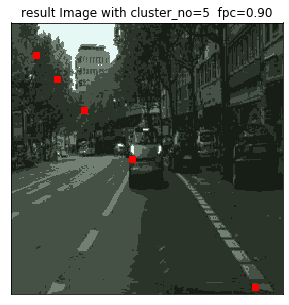

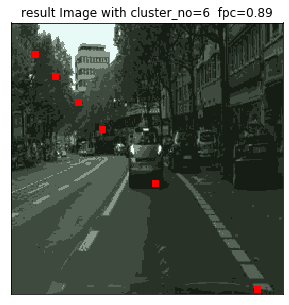

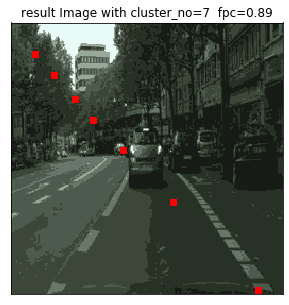

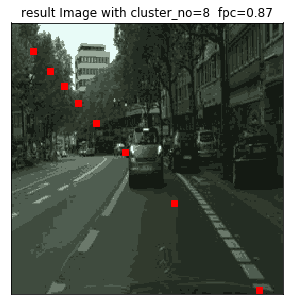

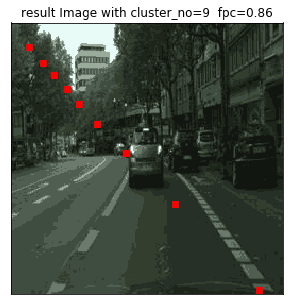

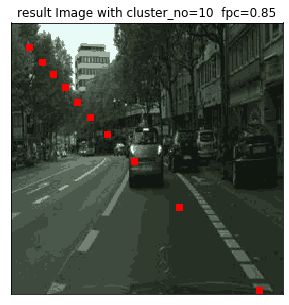

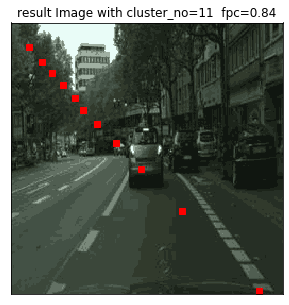

In [207]:
fpcs = []
figure_size1 = 5
color = np.array([[0,0,255],[255,0,255],[0,255,0],[128,0,128],[255,0,0],[255,255,0],[0,128,128],[128,128,0],[0,255,255],[0,0,0]])

for ncenters in range(2,12):
   
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        vectorized1_t, ncenters, 1.5, error=0.001, maxiter=1000, init=None)
    
    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u,axis=0)
    
    ####################
    center1 = np.uint8(np.transpose(cntr))
    center1 = np.transpose(center1)
    #center1 = np.copy(color[:ncenters])
    #print(center1.shape) 
    
    res1 = center1[cluster_membership]
    #np.transpose(vectorized_t).reshape(img.shape)
    result_image1 = res1.reshape((img1.shape))
    ####################
    
    plt.figure(figsize=(figure_size1,figure_size1))
    plt.imshow(result_image1)
    plt.title('result Image with cluster_no=%i  fpc=%.2f'%(ncenters,fpc)), plt.xticks([]), plt.yticks([])
    

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        plt.plot(pt[0], pt[1], 'rs')

    plt.show()


Text(0, 0.5, 'Fuzzy partition coefficient')

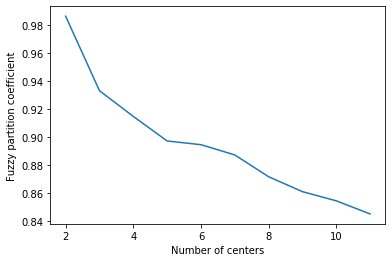

In [208]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:12], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

In [209]:
n_original = 11

(Text(0.5, 1.0, 'result Image with cluster_no=11  fpc=0.84'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

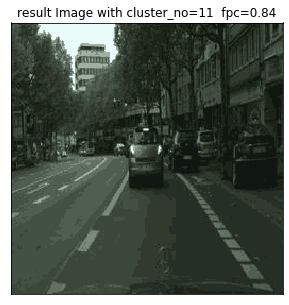

In [216]:
cntr_ori, u_ori, u0_ori, d_ori, jm_ori, p_ori, fpc_ori = fuzz.cluster.cmeans(
        vectorized1_t, n_original, 1.5, error=0.001, maxiter=1000, init=None)
    
    # Store fpc values for later


    # Plot assigned clusters, for each data point in training set
cluster_membership_ori = np.argmax(u_ori,axis=0)
    
    ####################
center1_ori = np.uint8(np.transpose(cntr_ori))
center1_ori = np.transpose(center1_ori)
    #center1 = np.copy(color[:ncenters])
    #print(center1.shape) 
    
res1_ori = center1_ori[cluster_membership_ori]
    #np.transpose(vectorized_t).reshape(img.shape)
result_image1_ori = res1_ori.reshape((img1.shape))
    ####################
    
plt.figure(figsize=(figure_size1,figure_size1))
plt.imshow(result_image1_ori)
plt.title('result Image with cluster_no=%i  fpc=%.2f'%(n_original,fpc_ori)), plt.xticks([]), plt.yticks([])

In [218]:
ground_image = cv2.imread('mk.png')
ground_image = ground_image[:,:256]
img_ground = cv2.cvtColor(ground_image, cv2.COLOR_BGR2RGB)


In [219]:
vectorized_ground = img_ground.reshape((-1, 3))
#vectorized = np.float32(vectorized)

In [220]:
vectorized_t_ground = np.transpose(vectorized_ground)
vectorized_t_ground #dimention = (3,n).... 3 is number of features , n is number of data

array([[ 1,  1,  1, ..., 19, 59, 19],
       [ 1,  1,  1, ...,  8, 13,  8],
       [ 1,  1,  1, ..., 25, 52, 25]], dtype=uint8)

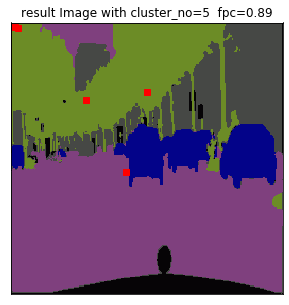

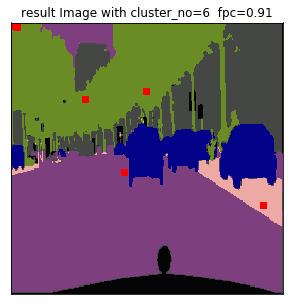

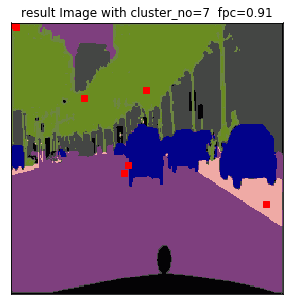

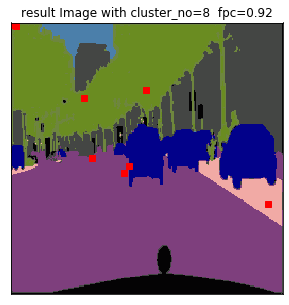

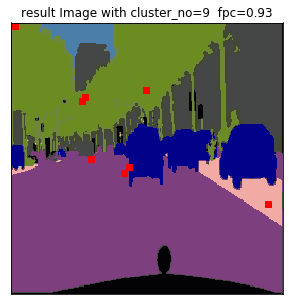

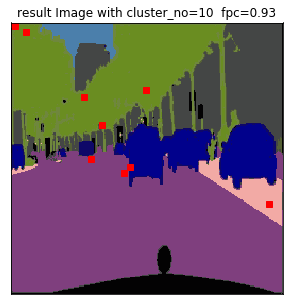

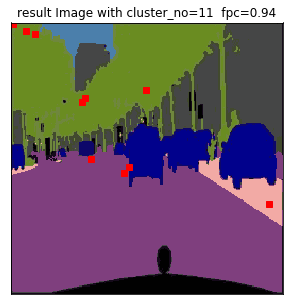

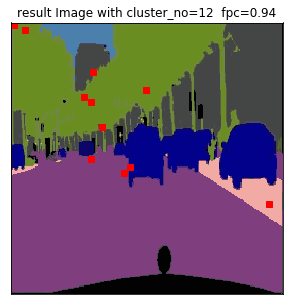

In [221]:
fpcs = []
figure_size1 = 5
color = np.array([[0,0,255],[255,0,255],[0,255,0],[128,0,128],[255,0,0],[255,255,0],[0,128,128],[128,128,0],[0,255,255],[0,0,0]])

for ncenters in range(5,13):
   
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        vectorized_t_ground, ncenters, 2, error=0.0005, maxiter=1000, init=None)
    
    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership_ground = np.argmax(u, axis=0)
    
    ####################
    center1 = np.uint8(np.transpose(cntr))
    center1 = np.transpose(center1)
    #center1 = np.copy(color[:ncenters])
    #print(center1.shape) 
    
    res1 = center1[cluster_membership_ground]
    #np.transpose(vectorized_t).reshape(img.shape)
    result_image1 = res1.reshape((img_ground.shape))
    ####################
    
    plt.figure(figsize=(figure_size1,figure_size1))
    plt.imshow(result_image1)
    plt.title('result Image with cluster_no=%i  fpc=%.2f'%(ncenters,fpc)), plt.xticks([]), plt.yticks([])
    

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        plt.plot(pt[0], pt[1], 'rs')

    plt.show()

#fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

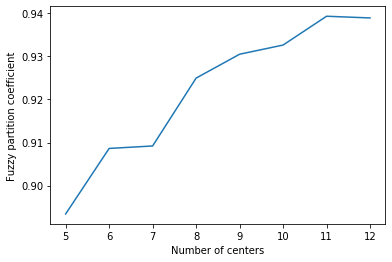

In [222]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[5:13], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

In [223]:
n_groundtruth = 11

In [225]:
final_label = np.copy(cluster_membership_ground)
for j in range(n_original):
    arr = []
    
        
    arr = [i*(cluster_membership_ori[i]==j) for i in range(1,len(cluster_membership_ori))]
    arr = np.unique(arr)
    
    arr = np.delete(arr,0)
    if cluster_membership_ori[0]==j:
        arr = np.concatenate((np.array([0]),arr),axis=None)
    #print(arr,j)
    #print(arr,j)
    new_label = []
    new_label = np.copy(cluster_membership_ground[arr])
    max_label =0
    max_no = 0
    for i in range(n_groundtruth):
        if np.count_nonzero(new_label==i) > max_no:
            max_no = np.count_nonzero(new_label==i)
            print(max_no,"....",i)
            max_label = i
   
    final_label[arr]=max_label

3 .... 0
177 .... 2
735 .... 3
4666 .... 6
1 .... 0
89 .... 2
123 .... 3
216 .... 4
565 .... 6
39 .... 0
220 .... 2
1321 .... 3
1332 .... 4
4635 .... 6
1 .... 0
118 .... 2
217 .... 3
246 .... 4
1549 .... 6
1252 .... 1
317 .... 0
2052 .... 2
1 .... 1
46 .... 2
318 .... 4
157 .... 2
487 .... 3
3717 .... 6
527 .... 0
626 .... 2
2902 .... 3
7359 .... 6
252 .... 0
1050 .... 2
2881 .... 3
622 .... 0
2781 .... 3


In [230]:
(np.unique(final_label))

array([1, 2, 3, 4, 6], dtype=int64)

In [231]:
true_guess = (np.count_nonzero((final_label==cluster_membership_ground)==True))
true_guess

31775

In [232]:
accuracy = 100*((true_guess)/len(cluster_membership_ground))
accuracy

48.48480224609375